In [2]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
%matplotlib inline
import datetime
import time
import dateutil


yessir!


#First: just deal with timestamps (ignore battery)

In [3]:
file = 'batlog_fuji.dat'

# let's just read in the dates for now from this file
d = open(file, 'r')

date = [] # this will be the list of dates
dateraw = []
while True:
    # read in each line
    theline = d.readline()
    if (len(theline) == 0):
        break
    # use only the lines that have a date in them
    if (theline[0:3] != '   '):
        # add to list, strip off the trailing \n
        tmp = theline.strip()
        dateraw.append(tmp)
        # here i'm trying different ways to parse the timestamp
        # split the tmp up, b/c strptime doesn't understand timezones correctly
        #x = time.strptime( tmp[0:20]+tmp[24:], '%a %b %d %H:%M:%S %Y')
        #x = datetime.datetime.strptime( tmp[0:20]+tmp[24:], '%a %b %d %H:%M:%S %Y').timetuple()

        x = dateutil.parser.parse(tmp[0:20]+tmp[24:]).timetuple()
        date.append(time.mktime(x)/60./60./24.)
d.close()

In [4]:
print('I have used my computer for ' +str(len(date))+' minutes,')
print('or ' +str(len(date)/60./24.)+' days!')

I have used my computer for 154071 minutes,
or 106.99375 days!


In [5]:
print(dateraw[0])
print(date[0], date[0] % 1)

Tue Aug 14 10:41:46 PDT 2012
(15566.737337962963, 0.737337962962556)


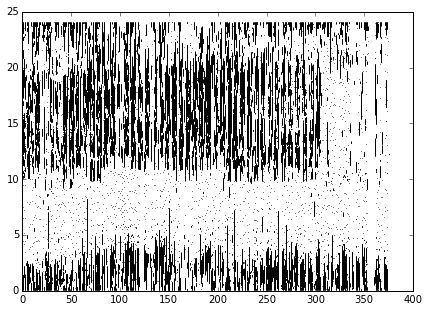

In [6]:
day = np.array(date, dtype='float')
timeofday = ((day-5/24.) % 1)*24

plt.figure(figsize=(7,5))
plt.plot(day-min(day),timeofday,'k,',alpha=0.5)

# pick the range of @MSR and before

(array([ 2014.,  1866.,  1303.,   509.,   123.,    37.,    38.,    25.,
           31.,   155.,   202.,   179.,   263.,   220.,   241.,   170.,
          234.,   215.,   269.,   268.,   622.,   380.,   525.,  1177.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

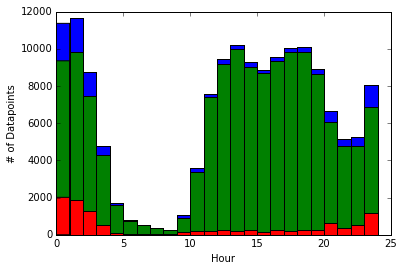

In [7]:
plt.hist(timeofday,bins=np.arange(0,25,1))
plt.xlabel('Hour')
plt.ylabel('# of Datapoints')

r1 = np.where((day-min(day)<310)) # normal use
r2 = np.where((day-min(day)>=310))# while I was at MSR
plt.hist(timeofday[r1],bins=np.arange(0,25,1)) 
plt.hist(timeofday[r2],bins=np.arange(0,25,1))


('Fri Sep  7 23:58:00 MDT 2012', 6.2902777777781012)


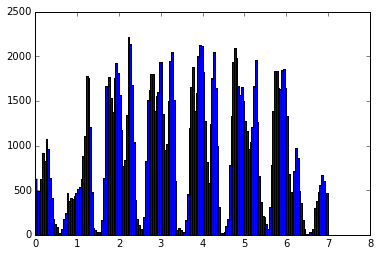

In [8]:
dayofweek = (day-3) % 7 
print(dateraw[10000], dayofweek[10000])

hist = plt.hist(dayofweek, bins=np.arange(0,8,1./24.) )

#Now let's think about the battery data too!

In [9]:
# now let's read in the dates and the battery charge from this file
d = open(file, 'r')

date = [] # this will be the list of dates
dateraw = []
chrg = []
capc = []
while True:
    # read in each line
    theline = d.readline()
    if (len(theline) == 0):
        break
    # use only the lines that have a date in them
    if (theline[0:3] != '   '):
        # add to list, strip off the trailing \n
        tmp = theline.strip()
        x = dateutil.parser.parse(tmp).timetuple()

    if ((theline[0:3] == '   ') & 
        (theline[19:26] == 'MaxCapa')):
        captmp = theline[34:].strip()

    if ((theline[0:3] == '   ') & 
        (theline[19:26] == 'Current')):
        chrg.append(theline[38:].strip())
        capc.append(captmp)
        
        dateraw.append(tmp)
        date.append(time.mktime(x)/60./60./24.)

d.close()


In [10]:
# setup some variables to plot
charge = np.array(chrg, dtype='float')
capacity = np.array(capc, dtype='float')
day = np.array(date, dtype='float')
timeofday = ((day-7/24.) % 1)*24

maxchrg = 6700. # on this particular laptop


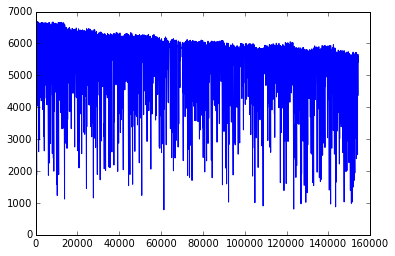

In [11]:
plt.plot(charge) #vs date?, as percent?

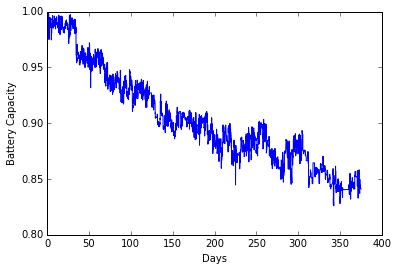

In [12]:
# change size, make dots?
plt.plot(day-min(day),capacity/maxchrg)
plt.ylim((.8,1))
plt.ylabel('Battery Capacity')
plt.xlabel('Days')

<matplotlib.colorbar.Colorbar instance at 0x10af8c3b0>

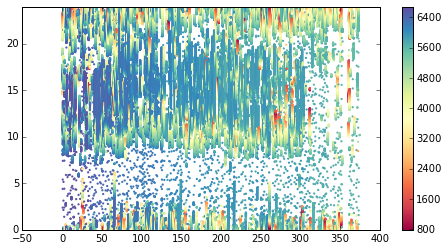

In [13]:
# make bigger, set xlim, labels 
plt.figure(figsize=(8,4))
plt.scatter(day-min(day),timeofday, c=charge, edgecolor='none',
            marker='.',cmap=cm.Spectral)
plt.ylim((0,24))
#plt.xlim((0,50))
plt.colorbar()